# Step 1: Installation and Setup

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os, sys
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.model_selection import train_test_split
import ssl
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense
from tensorflow.keras.models import Model

In [2]:
# Importing the dataset 
from PIL import Image
import os, sys
path = "."

dirs_train_o = os.listdir(path + "/TRAIN/O")
dirs_train_r = os.listdir(path + "/TRAIN/R")
dirs_test_o = os.listdir(path + "/TEST/O")
dirs_test_r = os.listdir(path + "/TEST/R")

# Resize image using Pillow
class_name = ['O', 'R']
# Create training set
x_train = []
x_train.append(dirs_train_o)
x_train.append(dirs_train_r)

# Create testing test
x_test = []
x_test.append(dirs_test_o)
x_test.append(dirs_test_r)

def modify_image(dataset, pathname):
  names = []
  labels = []
  for type in range(2):
    for item in dataset[type]:
      path_tmp = path + "/" + pathname + "/" + class_name[type] + "/"
      if os.path.isfile(path_tmp+item):
        im = Image.open(path_tmp+item)
        imResize = im.resize((128, 128), Image.ANTIALIAS)
        if imResize.mode != 'RGB':
          imResize = imResize.convert('RGB')
        names.append(imResize)
        labels.append(type)
  return names, labels

names_train, labels_train = modify_image(x_train, "TRAIN")
names_test, labels_test = modify_image(x_test, "TEST")
print("Done")

Done


In [3]:
# Train
x_train = np.array([np.array(fname) for fname in names_train])
y_train = np.array(labels_train)

# Test
x_test = np.array([np.array(fname) for fname in names_test])
y_test = np.array(labels_test)

In [4]:
mbnet_model = tf.keras.models.Sequential()
mbnet_model.add(tf.keras.applications.MobileNetV2(include_top=False, weights="imagenet", input_shape=(128,128,3)))
mbnet_model.add(tf.keras.layers.GlobalAveragePooling2D())
mbnet_model.add(Dense(1, activation='sigmoid'))
mbnet_model.layers[0].trainable = False
mbnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
mbnet_model.compile(optimizer= 'Adam', loss='binary_crossentropy', metrics=['accuracy'])
mbnet_history = mbnet_model.fit(x_train, y_train, batch_size=10, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
1806/1806 [==============================] - 126s 70ms/step - loss: 0.4750 - accuracy: 0.7761 - val_loss: 0.4460 - val_accuracy: 0.7939
Epoch 2/20
1806/1806 [==============================] - 122s 67ms/step - loss: 0.4271 - accuracy: 0.8077 - val_loss: 0.4149 - val_accuracy: 0.8150
Epoch 3/20
1806/1806 [==============================] - 121s 67ms/step - loss: 0.4102 - accuracy: 0.8157 - val_loss: 0.4177 - val_accuracy: 0.8152
Epoch 4/20
1806/1806 [==============================] - 121s 67ms/step - loss: 0.4047 - accuracy: 0.8208 - val_loss: 0.4039 - val_accuracy: 0.8181
Epoch 5/20
1806/1806 [==============================] - 121s 67ms/step - loss: 0.3968 - accuracy: 0.8246 - val_loss: 0.4023 - val_accuracy: 0.8236
Epoch 6/20
1806/1806 [==============================] - 121s 67ms/step - loss: 0.3951 - accuracy: 0.8258 - val_loss: 0.3977 - val_accuracy: 0.8201
Epoch 7/20
1806/1806 [==============================] - 121s 67ms/step - loss: 0.3886 - accuracy: 0.8254 - val_loss: 0

79/79 [==============================] - 13s 162ms/step - loss: 0.3507 - accuracy: 0.8432
Loss = 0.3507258892059326
Test Accuracy = 0.84321528673172


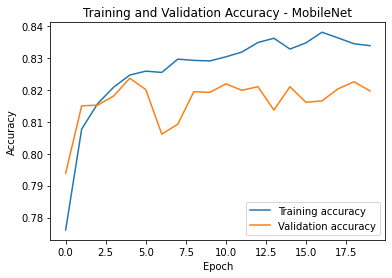

In [7]:
eval = mbnet_model.evaluate(x_test, y_test)
print ("Loss = " + str(eval[0]))
print ("Test Accuracy = " + str(eval[1]))

y_pred = mbnet_model.predict(x_test)

acc = mbnet_history.history['accuracy']
val_acc = mbnet_history.history['val_accuracy']
loss = mbnet_history.history['loss']
val_loss = mbnet_history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, label="Training accuracy")
plt.plot(epochs, val_acc, label="Validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("Training and Validation Accuracy - MobileNet")
plt.legend()
plt.savefig("acc-MobileNet")

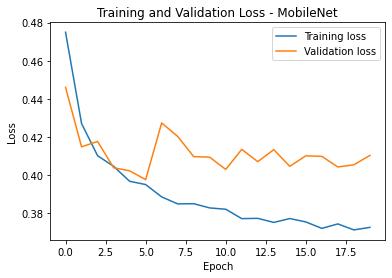

In [8]:
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Training and Validation Loss - MobileNet")
plt.legend()
# plt.figure()
plt.savefig("loss-MobileNet")

In [9]:
acc_score = accuracy_score(y_test, y_pred.round())
f1_score = f1_score(y_test, y_pred.round())
recall_score = recall_score(y_test, y_pred.round())
precision_score = precision_score(y_test, y_pred.round())
print(precision_score, recall_score, f1_score, acc_score)

0.8988888888888888 0.7275179856115108 0.8041749502982108 0.8432152805411859
